# Sales Analysis

### Import Libraries

In [37]:
import pandas as pd
import os
import datetime
import matplotlib.pyplot as plt

### Merge 12 months of sales data into a single file

In [4]:
path = "./Sales_Data" # let python know where to find the data files

data_list = [file for file in os.listdir(path) if not file.startswith('.')] # for loop that places all files in the path we just defined into a list, it ignores hidden files

all_data = pd.DataFrame() # Create a dataframe to store the merged data

for file in data_list: # for loop that merges all of the data in our list into a single file
    current_data = pd.read_csv(path+"/"+file)
    all_data = pd.concat([all_data, current_data])

all_data.to_csv("all_data_copy.csv", index=False)




In [8]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [7]:
all_data.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"
11685,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016"


### Clean the Data

#### Drop NaN (empty cells)

In [15]:
nan_df = all_data[all_data.isna().any(axis=1)] # Check where in the data NaN values are found
nan_df.head() # Entire rows in some areas have NaN values

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
all_data = all_data.dropna(how='all') # drop all NaN values from the data
all_data.head() # Check work

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


#### Remove Orders that do not have an order date

In [23]:
all_data = all_data[all_data['Order Date'].str[0:2]!='Or'] # Remove all data that has "Order Date" in the Order Date column instead of an actual date

#### Cast "Quantity Ordered" and "Price Each" columns as integers

In [24]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

### Add additional columns to make data easier to read

In [22]:
all_data['Month'] = all_data['Order Date'].str[0:2] # Add a month column
all_data['Month'] = all_data['Month'].astype('int32')


In [26]:
def get_city(address): # Function to pull the city from the address string
    return address.split(",")[1].strip(" ")

def get_state(address): # Function to pull the state from the address string
    return address.split(",")[2].split(" ")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})") # create a city / state column

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA)


### In what month was sales the highest?

In [83]:
all_data['Sales'] = all_data['Quantity Ordered'].astype('int') + all_data['Price Each'].astype('float') # get a total sales column by adding quantity sold to the price of the item

In [28]:
all_data.groupby(['Month']).sum()

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822671.38
2,13449,2188884.72,2202333.72
3,17005,2791207.83,2808212.83
4,20558,3367671.02,3388229.02
5,18667,3135125.13,3153792.13
6,15253,2562025.61,2577278.61
7,16072,2632539.56,2648611.56
8,13448,2230345.42,2243793.42
9,13109,2084992.09,2098101.09


range(1, 13)


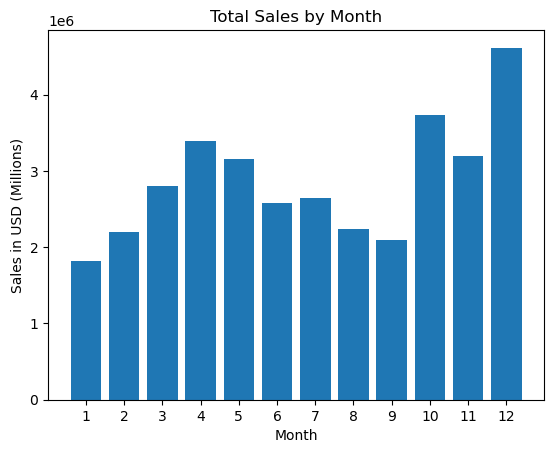

In [65]:
months = range(1,13)
print(months)

plt.bar(months,all_data.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD (Millions)')
plt.xlabel('Month')
plt.title('Total Sales by Month')
plt.show()

#### We can see from the above table and graph that December had the highest total sales for the year at $4,616,529.41

### What city sold the most product?

In [33]:
all_data.groupby(['City']).sum()

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2796510.20
Austin (TX),11153,1809873.61,69829,1821026.61
Boston (MA),22528,3637409.77,141112,3659937.77
Dallas (TX),16730,2752627.82,104620,2769357.82
Los Angeles (CA),33289,5421435.23,208325,5454724.23
New York City (NY),27932,4635370.83,175741,4663302.83
Portland (ME),2750,447189.25,17144,449939.25
Portland (OR),11303,1860558.22,70621,1871861.22
San Francisco (CA),50239,8211461.74,315520,8261700.74


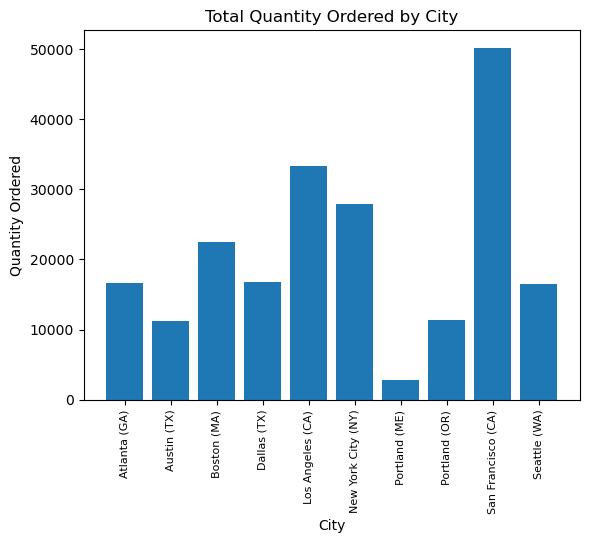

In [56]:
keys = [city for city, df in all_data.groupby(['City'])]

plt.bar(keys,all_data.groupby(['City']).sum()['Quantity Ordered'])
plt.ylabel('Quantity Ordered')
plt.xlabel('City')
plt.xticks(keys, rotation='vertical', size=8)
plt.yticks()
plt.title("Total Quantity Ordered by City")
plt.show()

#### We can see from the above table and the bar graph that San Francisco sold the most product with 50,239 items ordered.

### What time of day do most orders occur?


In [69]:
# Add hour and minute column
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
all_data['Count'] = 1
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX),13.95,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),100.99,22,30,1
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),601.00,14,38,1
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),12.99,14,38,1
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),12.99,9,27,1


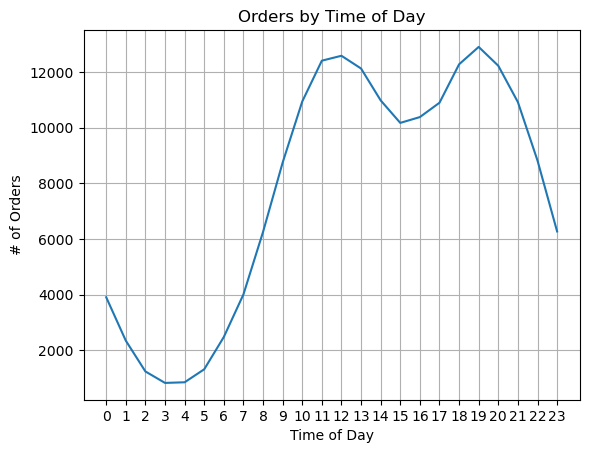

In [75]:
keys = [pair for pair, df in all_data.groupby(['Hour'])]

plt.plot(keys, all_data.groupby(['Hour']).count()['Count'])
plt.ylabel("# of Orders")
plt.xlabel("Time of Day")
plt.title("Orders by Time of Day")
plt.xticks(keys)
plt.grid()
plt.show()



#### Most orders occur between hour 10 and hour 20.

### What product was sold the most?

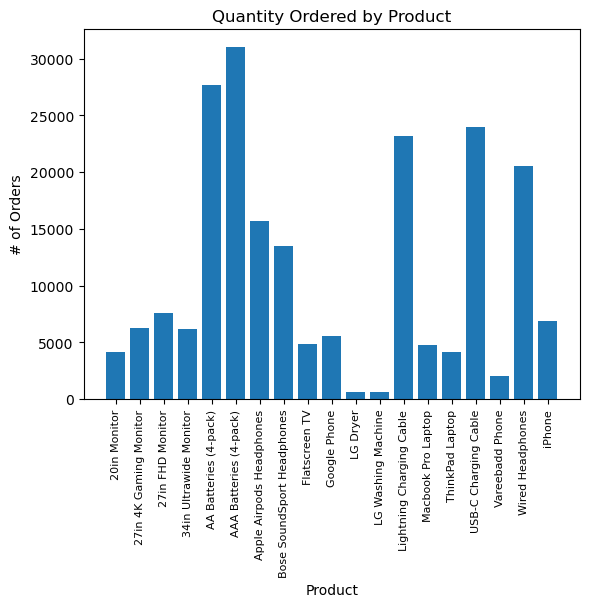

In [81]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xlabel("Product")
plt.ylabel("# of Orders")
plt.title("Quantity Ordered by Product")
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

#### Double and Triple A batteries sold the most.